In [15]:
import numpy as np      # linear algebra
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import date
import seaborn as sns
import numpy as np
import wordcloud as wc
import matplotlib as mat
from matplotlib import pyplot as plt
from pandas.api.types import CategoricalDtype
import sklearn as sk
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
plt.style.use('fivethirtyeight')

## **Loading Data for Calendar**

In [16]:
calender_raw_df = pd.read_csv("/content/calendar.csv", parse_dates = ['date'])

In [17]:
calender_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80060 entries, 0 to 80059
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   listing_id  80060 non-null  int64         
 1   date        80059 non-null  datetime64[ns]
 2   available   80059 non-null  object        
 3   price       51982 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.4+ MB


In [18]:
calender_raw_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
80055,7228499,2016-05-03,t,$395.00
80056,7228499,2016-05-04,t,$395.00
80057,7228499,2016-05-05,t,$395.00
80058,7228499,2016-05-06,t,$395.00


## **Data Cleaning for Calender**

In [19]:
calender_raw_df['price'].replace('\$|,','',regex = True, inplace = True)

In [20]:
calender_raw_df

,listing_id,date,available,price
0,241032,2016-01-04,t,85.00
1,241032,2016-01-05,t,85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
80055,7228499,2016-05-03,t,395.00
80056,7228499,2016-05-04,t,395.00
80057,7228499,2016-05-05,t,395.00
80058,7228499,2016-05-06,t,395.00


In [21]:
calender_raw_df['price'].fillna(0, inplace = True)

In [22]:
calender_raw_df

,listing_id,date,available,price
0,241032,2016-01-04,t,85.00
1,241032,2016-01-05,t,85.00
2,241032,2016-01-06,f,0
3,241032,2016-01-07,f,0
4,241032,2016-01-08,f,0
...,...,...,...,...
80055,7228499,2016-05-03,t,395.00
80056,7228499,2016-05-04,t,395.00
80057,7228499,2016-05-05,t,395.00
80058,7228499,2016-05-06,t,395.00


In [23]:
calender_raw_df['price'] = calender_raw_df['price'].astype('float')

In [24]:
calender_raw_df

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0
...,...,...,...,...
80055,7228499,2016-05-03,t,395.0
80056,7228499,2016-05-04,t,395.0
80057,7228499,2016-05-05,t,395.0
80058,7228499,2016-05-06,t,395.0


In [25]:
import pandas as pd

# Convert 'date' column to datetime format
calender_raw_df['date'] = pd.to_datetime(calender_raw_df['date'])

# Extract the year from the 'date' column
calender_raw_df['year'] = calender_raw_df['date'].dt.year


In [26]:
calender_raw_df

,listing_id,date,available,price,year
0,241032,2016-01-04,t,85.0,2016.0
1,241032,2016-01-05,t,85.0,2016.0
2,241032,2016-01-06,f,0.0,2016.0
3,241032,2016-01-07,f,0.0,2016.0
4,241032,2016-01-08,f,0.0,2016.0
...,...,...,...,...,...
80055,7228499,2016-05-03,t,395.0,2016.0
80056,7228499,2016-05-04,t,395.0,2016.0
80057,7228499,2016-05-05,t,395.0,2016.0
80058,7228499,2016-05-06,t,395.0,2016.0


In [27]:
calender_raw_df['month'] = calender_raw_df['date'].dt.month

In [28]:
calender_raw_df['day'] = calender_raw_df['date'].dt.day

In [29]:
calender_raw_df

,listing_id,date,available,price,year,month,day
0,241032,2016-01-04,t,85.0,2016.0,1.0,4.0
1,241032,2016-01-05,t,85.0,2016.0,1.0,5.0
2,241032,2016-01-06,f,0.0,2016.0,1.0,6.0
3,241032,2016-01-07,f,0.0,2016.0,1.0,7.0
4,241032,2016-01-08,f,0.0,2016.0,1.0,8.0
...,...,...,...,...,...,...,...
80055,7228499,2016-05-03,t,395.0,2016.0,5.0,3.0
80056,7228499,2016-05-04,t,395.0,2016.0,5.0,4.0
80057,7228499,2016-05-05,t,395.0,2016.0,5.0,5.0
80058,7228499,2016-05-06,t,395.0,2016.0,5.0,6.0


In [30]:
calender_raw_df['day_name'] = calender_raw_df['date'].dt.day_name()

In [31]:
calender_raw_df

,listing_id,date,available,price,year,month,day,day_name
0,241032,2016-01-04,t,85.0,2016.0,1.0,4.0,Monday
1,241032,2016-01-05,t,85.0,2016.0,1.0,5.0,Tuesday
2,241032,2016-01-06,f,0.0,2016.0,1.0,6.0,Wednesday
3,241032,2016-01-07,f,0.0,2016.0,1.0,7.0,Thursday
4,241032,2016-01-08,f,0.0,2016.0,1.0,8.0,Friday
...,...,...,...,...,...,...,...,...
80055,7228499,2016-05-03,t,395.0,2016.0,5.0,3.0,Tuesday
80056,7228499,2016-05-04,t,395.0,2016.0,5.0,4.0,Wednesday
80057,7228499,2016-05-05,t,395.0,2016.0,5.0,5.0,Thursday
80058,7228499,2016-05-06,t,395.0,2016.0,5.0,6.0,Friday


In [32]:
calender_raw_df['available'].replace({'t|T':1, 'f|F':0},regex = True,inplace = True)

In [33]:
calender_raw_df

,listing_id,date,available,price,year,month,day,day_name
0,241032,2016-01-04,1.0,85.0,2016.0,1.0,4.0,Monday
1,241032,2016-01-05,1.0,85.0,2016.0,1.0,5.0,Tuesday
2,241032,2016-01-06,0.0,0.0,2016.0,1.0,6.0,Wednesday
3,241032,2016-01-07,0.0,0.0,2016.0,1.0,7.0,Thursday
4,241032,2016-01-08,0.0,0.0,2016.0,1.0,8.0,Friday
...,...,...,...,...,...,...,...,...
80055,7228499,2016-05-03,1.0,395.0,2016.0,5.0,3.0,Tuesday
80056,7228499,2016-05-04,1.0,395.0,2016.0,5.0,4.0,Wednesday
80057,7228499,2016-05-05,1.0,395.0,2016.0,5.0,5.0,Thursday
80058,7228499,2016-05-06,1.0,395.0,2016.0,5.0,6.0,Friday


In [34]:
calender_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80060 entries, 0 to 80059
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   listing_id  80060 non-null  int64         
 1   date        80059 non-null  datetime64[ns]
 2   available   80059 non-null  float64       
 3   price       80060 non-null  float64       
 4   year        80059 non-null  float64       
 5   month       80059 non-null  float64       
 6   day         80059 non-null  float64       
 7   day_name    80059 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 4.9+ MB


In [35]:
avail = calender_raw_df['available'] == 1

In [36]:
avail

0         True
1         True
2        False
3        False
4        False
         ...  
80055     True
80056     True
80057     True
80058     True
80059    False
Name: available, Length: 80060, dtype: bool

In [37]:
avail_df = calender_raw_df.loc[avail,:]

In [38]:
print(avail_df.head())

    listing_id       date  available  price    year  month   day   day_name
0       241032 2016-01-04        1.0   85.0  2016.0    1.0   4.0     Monday
1       241032 2016-01-05        1.0   85.0  2016.0    1.0   5.0    Tuesday
9       241032 2016-01-13        1.0   85.0  2016.0    1.0  13.0  Wednesday
10      241032 2016-01-14        1.0   85.0  2016.0    1.0  14.0   Thursday
14      241032 2016-01-18        1.0   85.0  2016.0    1.0  18.0     Monday


In [39]:
avail_df

,listing_id,date,available,price,year,month,day,day_name
0,241032,2016-01-04,1.0,85.0,2016.0,1.0,4.0,Monday
1,241032,2016-01-05,1.0,85.0,2016.0,1.0,5.0,Tuesday
9,241032,2016-01-13,1.0,85.0,2016.0,1.0,13.0,Wednesday
10,241032,2016-01-14,1.0,85.0,2016.0,1.0,14.0,Thursday
14,241032,2016-01-18,1.0,85.0,2016.0,1.0,18.0,Monday
...,...,...,...,...,...,...,...,...
80054,7228499,2016-05-02,1.0,395.0,2016.0,5.0,2.0,Monday
80055,7228499,2016-05-03,1.0,395.0,2016.0,5.0,3.0,Tuesday
80056,7228499,2016-05-04,1.0,395.0,2016.0,5.0,4.0,Wednesday
80057,7228499,2016-05-05,1.0,395.0,2016.0,5.0,5.0,Thursday


(0.0, 400.0)

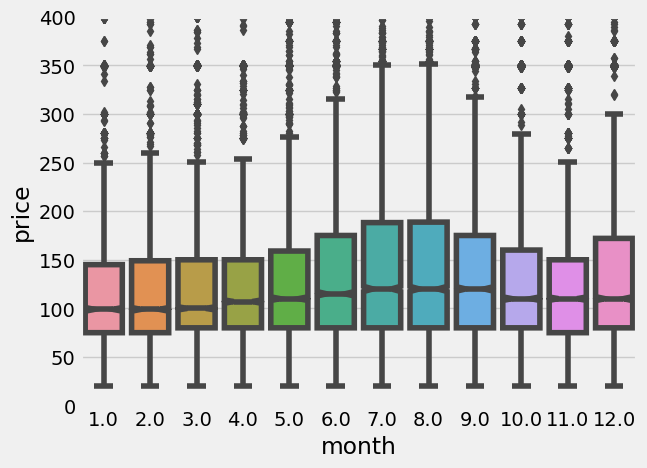

In [40]:
ax_1 = sns.boxplot(data = avail_df, x = 'month', y ='price', notch = True)
ax_1.set_xticklabels(ax_1.get_xticklabels())
ax_1.set_ylim(0,400)

Text(0.5, 1.0, 'Distribution of listing from January to December')

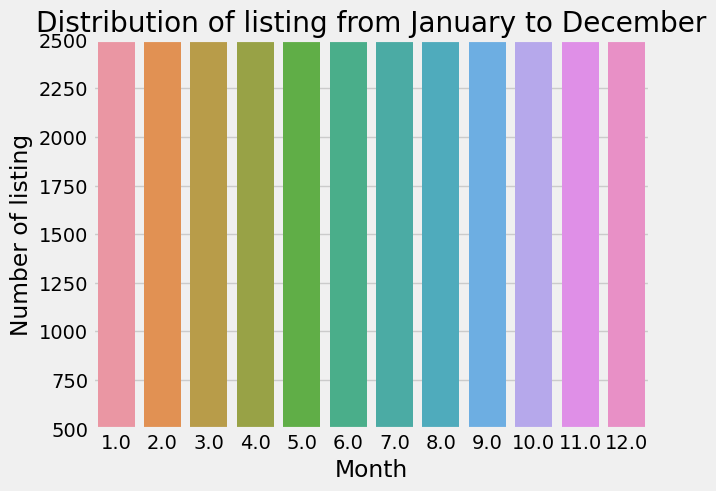

In [41]:
listing_group = avail_df.groupby('month').count()
ax_2 = sns.barplot(x= listing_group.index.values,y =listing_group['listing_id'] )
ax_2.set_ylim(500, 2500)
ax_2.set_ylabel("Number of listing")
ax_2.set_xlabel("Month")
ax_2.set_title("Distribution of listing from January to December")

## **EDA On Listing**

In [42]:
listings_df = pd.read_csv("/content/listings.csv", error_bad_lines=False)

<ipython-input-42-d8013ff7176d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  listings_df = pd.read_csv("/content/listings.csv", error_bad_lines=False)


In [43]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                714 non-null    int64  
 1   listing_url                       714 non-null    object 
 2   scrape_id                         714 non-null    int64  
 3   last_scraped                      714 non-null    object 
 4   name                              714 non-null    object 
 5   summary                           681 non-null    object 
 6   space                             615 non-null    object 
 7   description                       714 non-null    object 
 8   experiences_offered               714 non-null    object 
 9   neighborhood_overview             548 non-null    object 
 10  notes                             403 non-null    object 
 11  transit                           554 non-null    object 
 12  thumbnai

In [44]:
listings_df_miss = pd.DataFrame((listings_df.isnull().sum())*100/len(listings_df), columns=['% Missing Values'])
listings_df_miss[listings_df_miss['% Missing Values']>0]

,% Missing Values
summary,4.621849
space,13.865546
neighborhood_overview,23.249300
notes,43.557423
transit,22.408964
...,...
cancellation_policy,0.140056
require_guest_profile_picture,0.140056
require_guest_phone_verification,0.140056
calculated_host_listings_count,0.140056


In [45]:
missing_cols = ['security_deposit','cleaning_fee','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
listings_df[missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   security_deposit             390 non-null    object 
 1   cleaning_fee                 542 non-null    object 
 2   review_scores_rating         600 non-null    float64
 3   review_scores_accuracy       598 non-null    float64
 4   review_scores_cleanliness    600 non-null    float64
 5   review_scores_checkin        599 non-null    float64
 6   review_scores_communication  600 non-null    float64
 7   review_scores_location       599 non-null    float64
 8   review_scores_value          598 non-null    float64
 9   reviews_per_month            605 non-null    float64
dtypes: float64(8), object(2)
memory usage: 55.9+ KB


In [46]:
listings_df['security_deposit'] = listings_df['security_deposit'].fillna('$0').astype(str)
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].fillna('$0').astype(str)

listings_df['security_deposit'] = listings_df['security_deposit'].str.replace(',','').str.replace('$','').astype('float')
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].apply(lambda x: ''.join(x.split(',')))
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].apply(lambda x: float(x.split('$')[1]) if '$' in x else float(x))


<ipython-input-46-f654b290bcad>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings_df['security_deposit'] = listings_df['security_deposit'].str.replace(',','').str.replace('$','').astype('float')


In [47]:
for col in missing_cols:
    listings_df[col].fillna(0,inplace=True)
listings_df[missing_cols].sample(5)

,security_deposit,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
136,0.0,0.0,100.0,10.0,10.0,10.0,10.0,9.0,10.0,0.68
309,200.0,40.0,97.0,10.0,9.0,10.0,10.0,10.0,10.0,1.49
246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
10,0.0,15.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,3.33
408,100.0,0.0,100.0,10.0,10.0,10.0,10.0,9.0,10.0,1.76


In [48]:
# Convert 'amenities' column to string type
listings_df['amenities'] = listings_df['amenities'].astype(str)

# Now apply your lambda function
listings_df['amenities'] = listings_df['amenities'].apply(lambda x: x[1:-1].split(','))

# Rest of your code remains the same
listings_df['TV'] = 0
listings_df['Internet'] = 0
listings_df['Kitchen'] = 0
listings_df['Free_parking'] = 0
listings_df['Washer_dryer'] = 0
listings_df['Air Conditioning'] = 0
listings_df['Smoke_detector'] = 0

# Display the DataFrame
listings_df


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,TV,Internet,Kitchen,Free_parking,Washer_dryer,Air Conditioning,Smoke_detector
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,2.0,4.07,0,0,0,0,0,0,0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,t,6.0,1.48,0,0,0,0,0,0,0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,2.0,1.15,0,0,0,0,0,0,0
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,1.0,0.00,0,0,0,0,0,0,0
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,1.0,0.89,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,3630581,https://www.airbnb.com/rooms/3630581,20160104002432,2016-01-04,Center UW Comfy Quiet & View (302),It has a Walk Score of 98 out of 100. This loc...,Large clean furnished studio on the 3rd floor...,It has a Walk Score of 98 out of 100. This loc...,none,It is located in the bustling and vibrant Univ...,...,f,34.0,0.53,0,0,0,0,0,0,0
710,9394508,https://www.airbnb.com/rooms/9394508,20160104002432,2016-01-04,Steps to UW Wood Floor Remodeled 12,It has a Walk Score of 94--Walker's Paradise. ...,Newly furnished one bedroom apartments in a qu...,It has a Walk Score of 94--Walker's Paradise. ...,none,It is located in the bustling and vibrant Univ...,...,f,11.0,0.67,0,0,0,0,0,0,0
711,7348578,https://www.airbnb.com/rooms/7348578,20160104002432,2016-01-04,Elegant Tangerine Room w/Breakfast,"This room is spacious, clean, peaceful and com...",Your room is downstairs through the dinning ro...,"This room is spacious, clean, peaceful and com...",none,The University district neighborhood is amazin...,...,f,21.0,5.26,0,0,0,0,0,0,0
712,8869680,https://www.airbnb.com/rooms/8869680,20160104002432,2016-01-04,Great Location HEART of UW Studio,"Location, location, location.. Convenience out...",A very comfortable Queen sized bed welcomes yo...,"Location, location, location.. Convenience out...",none,"Heart of university district, very near downto...",...,t,2.0,2.69,0,0,0,0,0,0,0


In [49]:
for i in range(len(listings_df)):
    if 'TV' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'TV'] = 1
    if 'Internet' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Internet'] = 1
    if 'Kitchen' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Kitchen'] = 1
    if '"Free Parking on Premises"' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Free_parking'] = 1
    if 'Washer' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Washer_dryer'] = 1
    if '"Air Conditioning"' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Air Conditioning'] = 1
    if '"Smoke Detector"' in listings_df.loc[i,'amenities']:
        listings_df.loc[i,'Smoke_detector'] = 1
listings_df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,TV,Internet,Kitchen,Free_parking,Washer_dryer,Air Conditioning,Smoke_detector
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,2.0,4.07,1,1,1,0,1,1,0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,t,6.0,1.48,1,1,1,1,1,0,1
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,2.0,1.15,1,1,1,1,1,1,1
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,1.0,0.00,0,1,1,0,1,0,1
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,1.0,0.89,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,3630581,https://www.airbnb.com/rooms/3630581,20160104002432,2016-01-04,Center UW Comfy Quiet & View (302),It has a Walk Score of 98 out of 100. This loc...,Large clean furnished studio on the 3rd floor...,It has a Walk Score of 98 out of 100. This loc...,none,It is located in the bustling and vibrant Univ...,...,f,34.0,0.53,0,1,1,0,0,0,0
710,9394508,https://www.airbnb.com/rooms/9394508,20160104002432,2016-01-04,Steps to UW Wood Floor Remodeled 12,It has a Walk Score of 94--Walker's Paradise. ...,Newly furnished one bedroom apartments in a qu...,It has a Walk Score of 94--Walker's Paradise. ...,none,It is located in the bustling and vibrant Univ...,...,f,11.0,0.67,1,1,1,0,1,0,1
711,7348578,https://www.airbnb.com/rooms/7348578,20160104002432,2016-01-04,Elegant Tangerine Room w/Breakfast,"This room is spacious, clean, peaceful and com...",Your room is downstairs through the dinning ro...,"This room is spacious, clean, peaceful and com...",none,The University district neighborhood is amazin...,...,f,21.0,5.26,0,1,1,0,1,0,1
712,8869680,https://www.airbnb.com/rooms/8869680,20160104002432,2016-01-04,Great Location HEART of UW Studio,"Location, location, location.. Convenience out...",A very comfortable Queen sized bed welcomes yo...,"Location, location, location.. Convenience out...",none,"Heart of university district, very near downto...",...,t,2.0,2.69,0,0,1,0,1,0,1


## **EDA ON 'REVIEW'**

In [50]:
reviews_df = pd.read_csv('/content/reviews.csv', engine='python')

In [51]:
reviews_df['comments'].fillna("None", inplace=True)
print(reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84849 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB
None


In [53]:
# Convert 'date' column to datetime type
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

# Extract year, month, day, and day_name
reviews_df['Year'] = reviews_df['date'].dt.year
reviews_df['Month'] = reviews_df['date'].dt.month
reviews_df['Day'] = reviews_df['date'].dt.day
reviews_df['day_name'] = reviews_df['date'].dt.day_name()

listing_join_list = ['id', 'price', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'cleaning_fee',
                     'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                     'review_scores_value']

# Assuming you have a DataFrame called 'listings_df'
review_info_df = pd.DataFrame(reviews_df.groupby('listing_id').count()['comments'].sort_values(ascending=False))
review_info_df = pd.merge(review_info_df, listings_df[listing_join_list], left_index=True, right_on='id')
review_info_df.rename({'comments': 'comment counts'}, axis=1, inplace=True)
print(review_info_df.head(10))


     comment counts       id    price neighbourhood_group_cleansed  \
96              244    20927   $89.00                      Ballard   
343             207   456040   $55.00          Other neighborhoods   
0               207   241032   $85.00                   Queen Anne   
348             203   522287   $55.00          Other neighborhoods   
63              191   762029   $60.00                   Queen Anne   
351             182    43373   $59.00          Other neighborhoods   
10              181   175576   $95.00                   Queen Anne   
605             181   143704   $82.00                 Central Area   
7               173   856550   $60.00                   Queen Anne   
81              165  2686374  $149.00                      Ballard   

    property_type        room_type  cleaning_fee  review_scores_rating  \
96          Cabin  Entire home/apt          10.0                  97.0   
343         House     Private room           0.0                  96.0   
0      

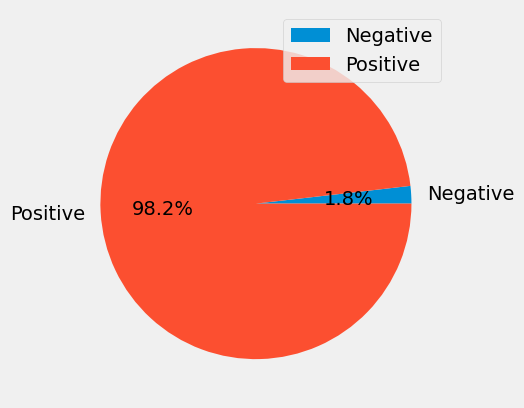

In [54]:
neg_rating = review_info_df['review_scores_rating'][review_info_df['review_scores_rating'] < 80]
plt.pie([neg_rating.count(), review_info_df.shape[0] - neg_rating.count()], labels=['Negative', 'Positive'],
        autopct='%1.1f%%')
plt.legend()

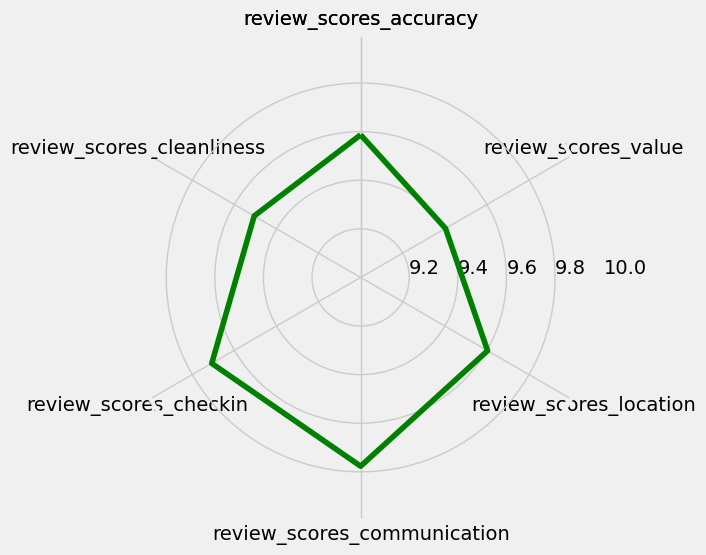

In [55]:
detail_score_rating_l = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value']
mean_score = review_info_df[detail_score_rating_l].mean(axis=0, skipna=True)

data_length = mean_score.shape[0]
angles = np.linspace(0, 2*np.pi, data_length, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((mean_score.index.values, [mean_score.index.values[0]]))
scores = np.concatenate((mean_score.values, [mean_score.values[0]]))
fig = plt.figure(figsize=(8, 6), dpi=100)
ax_2_2_a_2 = plt.subplot(111, polar=True)
ax_2_2_a_2.plot(angles, scores, color='g')
ax_2_2_a_2.set_thetagrids(angles*180/np.pi, labels)
ax_2_2_a_2.set_theta_zero_location('N')
ax_2_2_a_2.set_rlim(9, 10)
ax_2_2_a_2.set_rlabel_position(270)

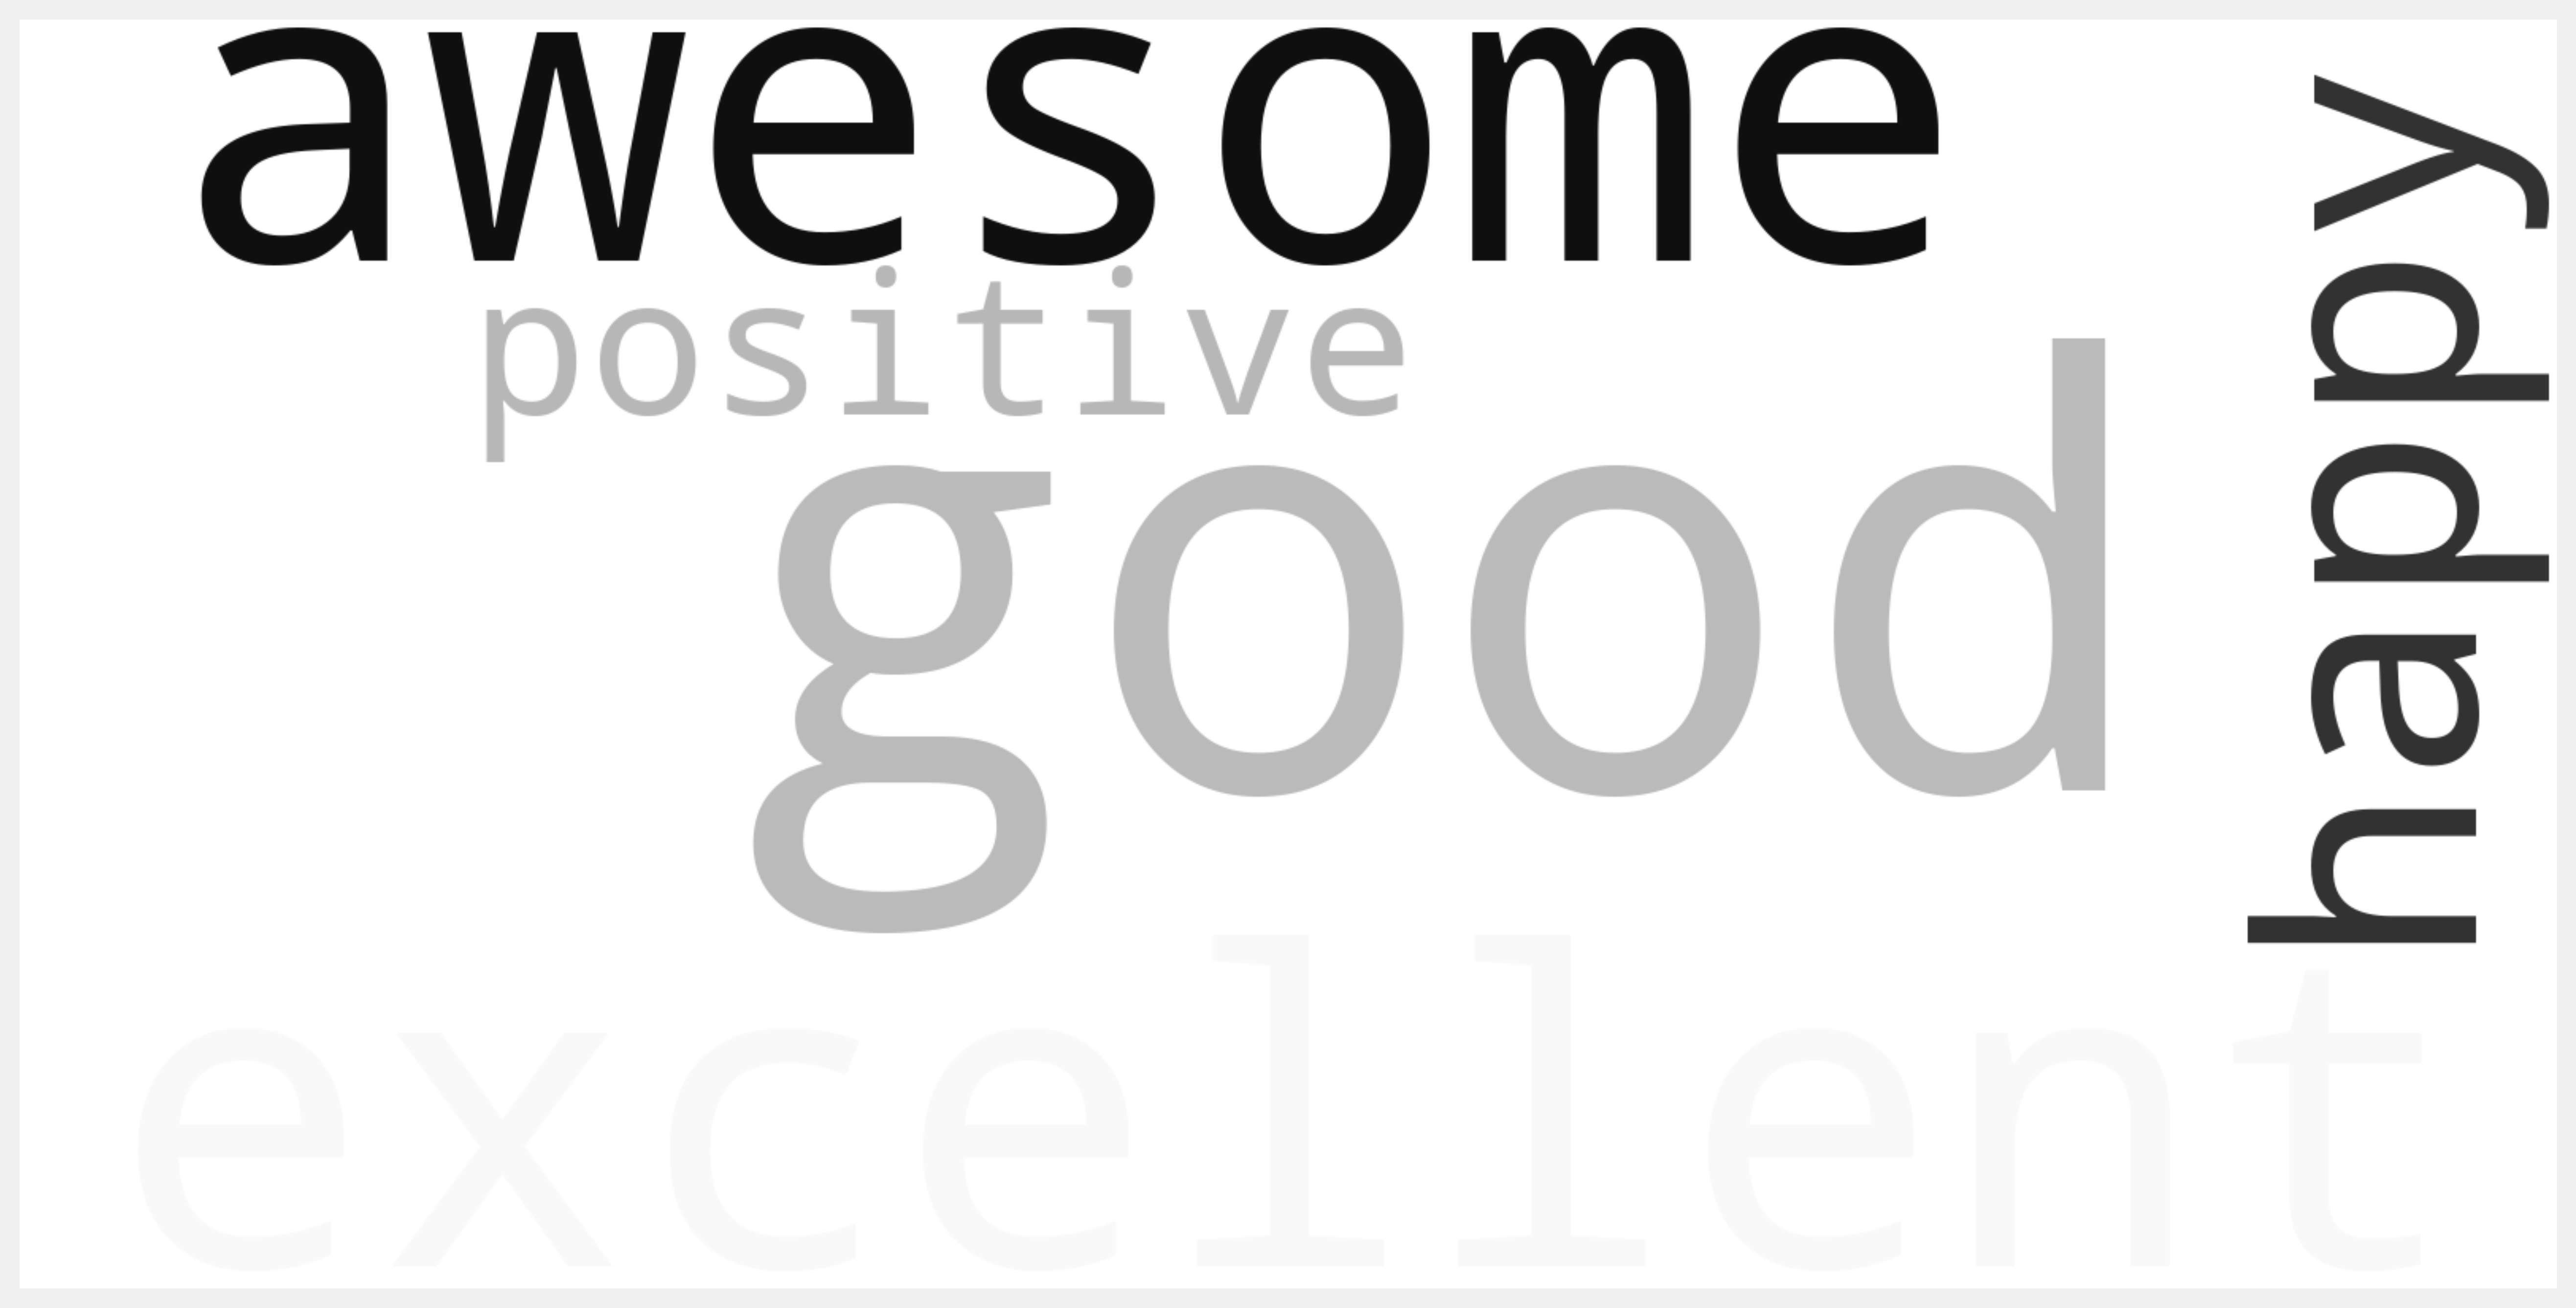

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a list of positive keywords
positive_keywords = ['good', 'excellent', 'happy', 'awesome', 'positive']

# Assuming your DataFrame is named 'reviews_df' and it has a column 'comments'
comments = reviews_df['comments'].tolist()

# Using CountVectorizer to get the frequency of each word
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))

# Creating a WordCloud dictionary for positive keywords
pos_keyword_dict = {word: word_frequencies[word] for word in positive_keywords if word in word_frequencies}

# Generating WordCloud with a light theme
pos_word_wc = WordCloud(width=1600, height=800, background_color='white', colormap='gist_gray').generate_from_frequencies(pos_keyword_dict)

# Plotting the WordCloud with a light theme
plt.figure(figsize=(20, 8), dpi=400)
plt.imshow(pos_word_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


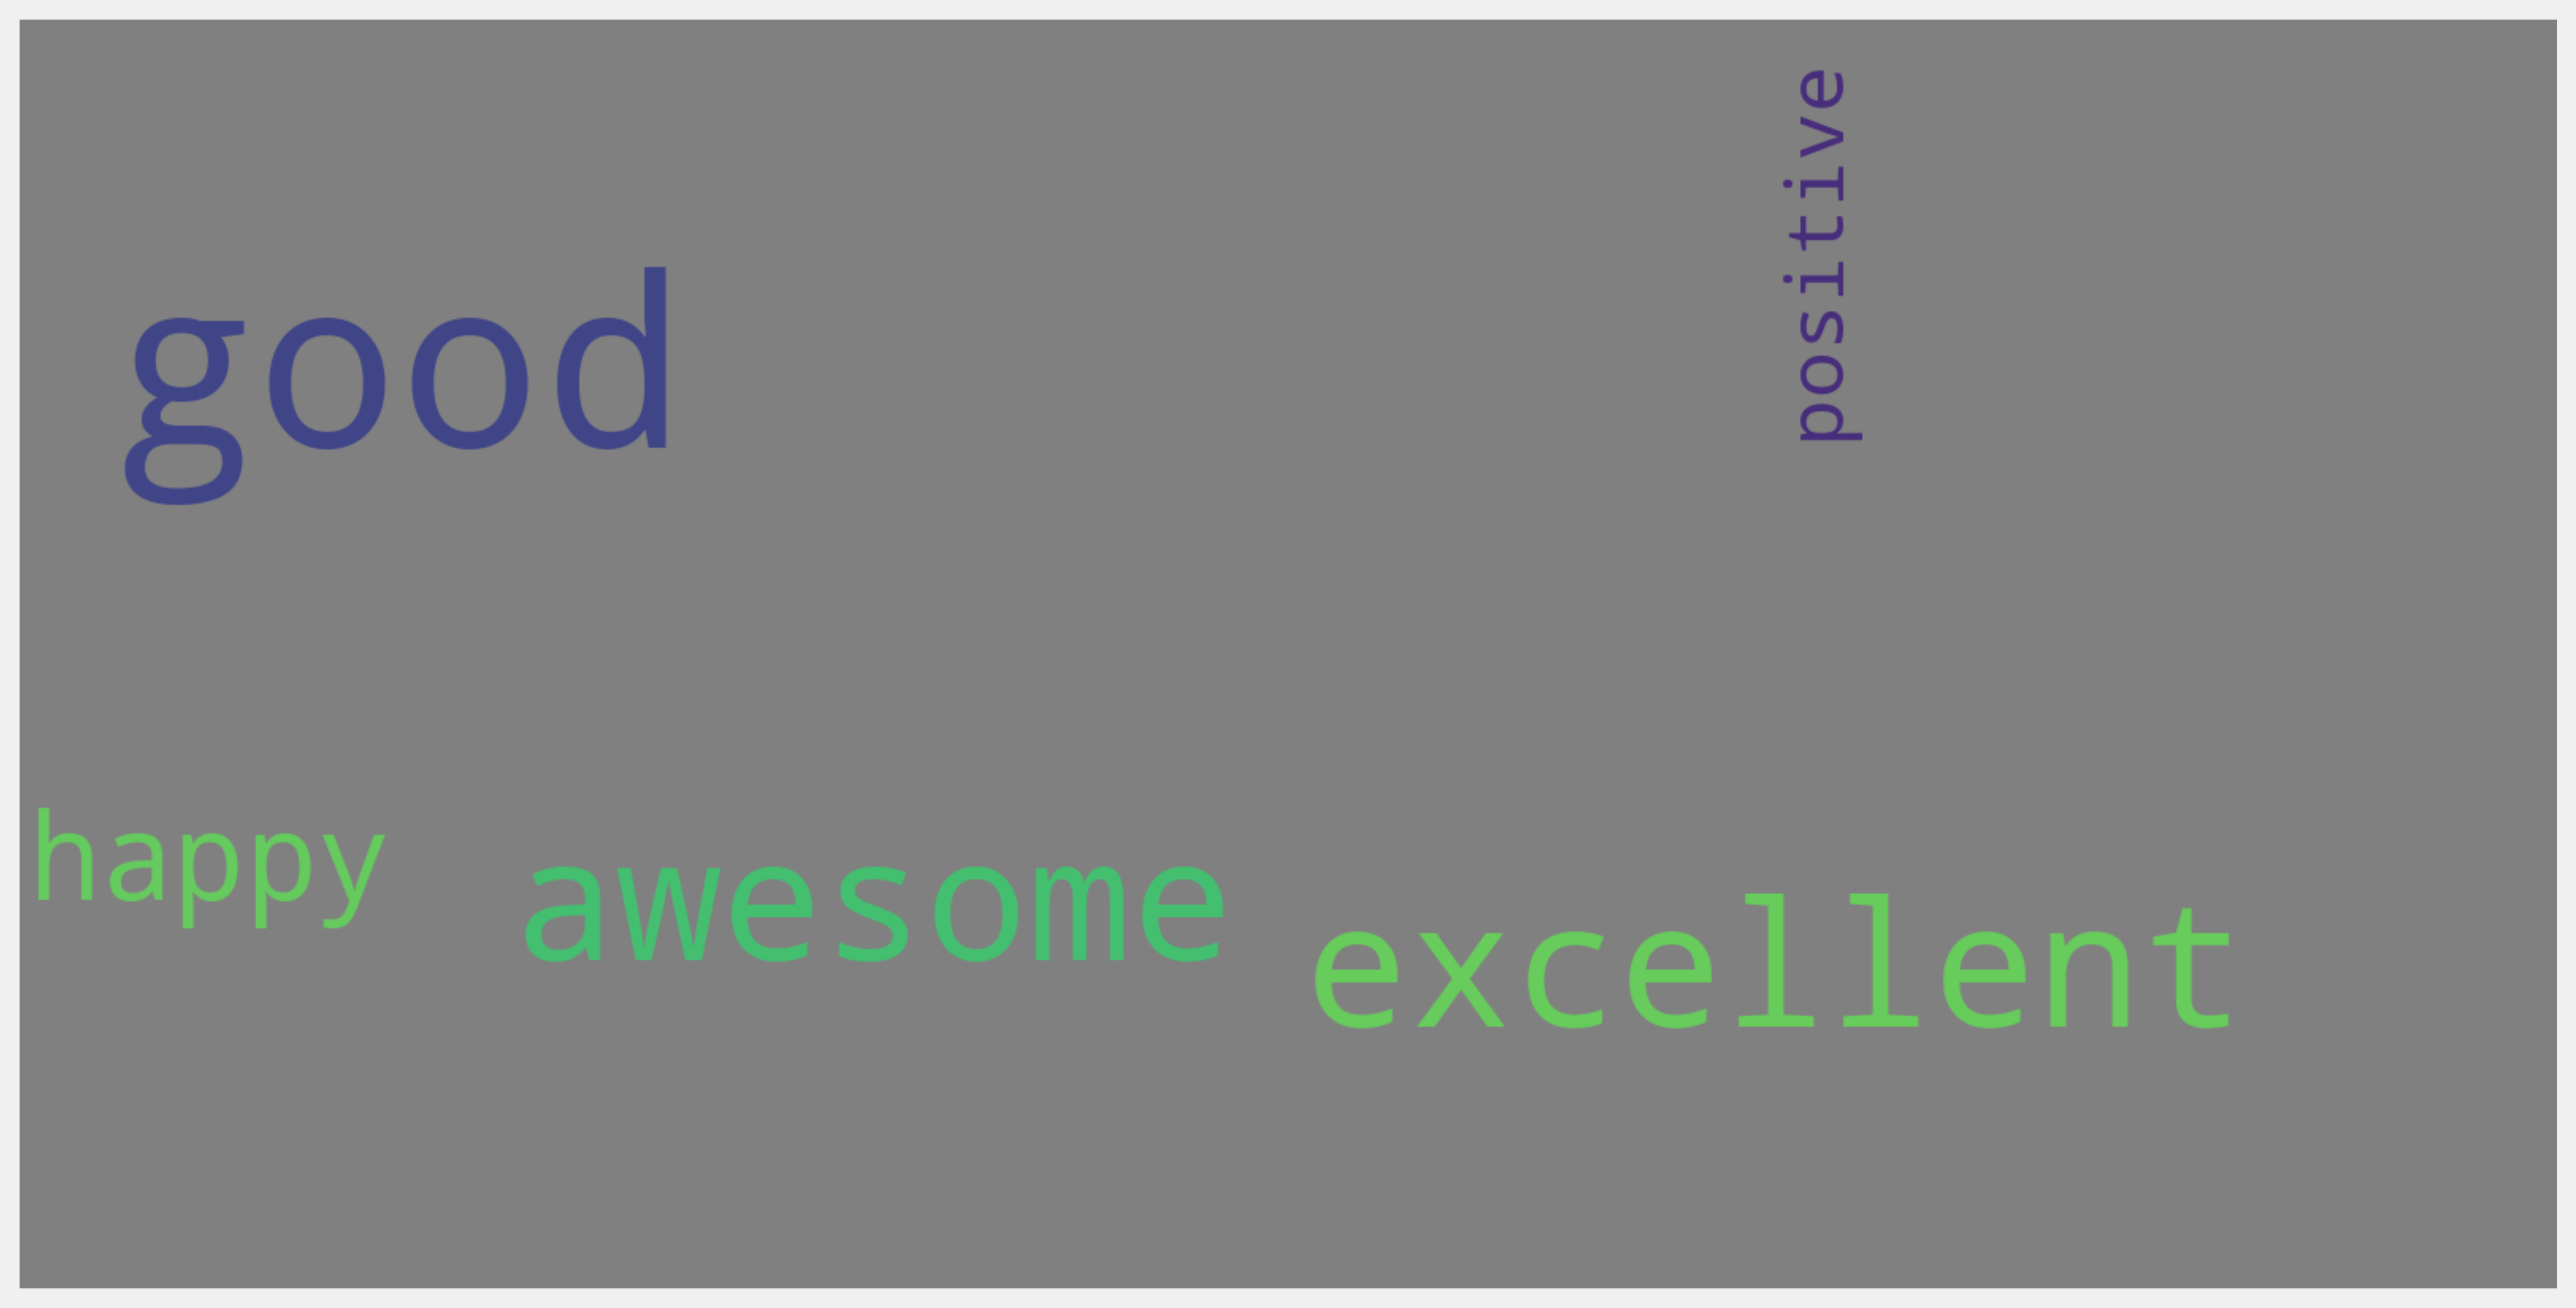

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Rest of your code remains unchanged...

# Generating WordCloud with different styles
pos_word_wc = WordCloud(width=1600, height=800, background_color='grey', colormap='viridis', max_words=100, max_font_size=150).generate_from_frequencies(pos_keyword_dict)

# Plotting the WordCloud in a different style
plt.figure(figsize=(20, 8), dpi=400)
plt.imshow(pos_word_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


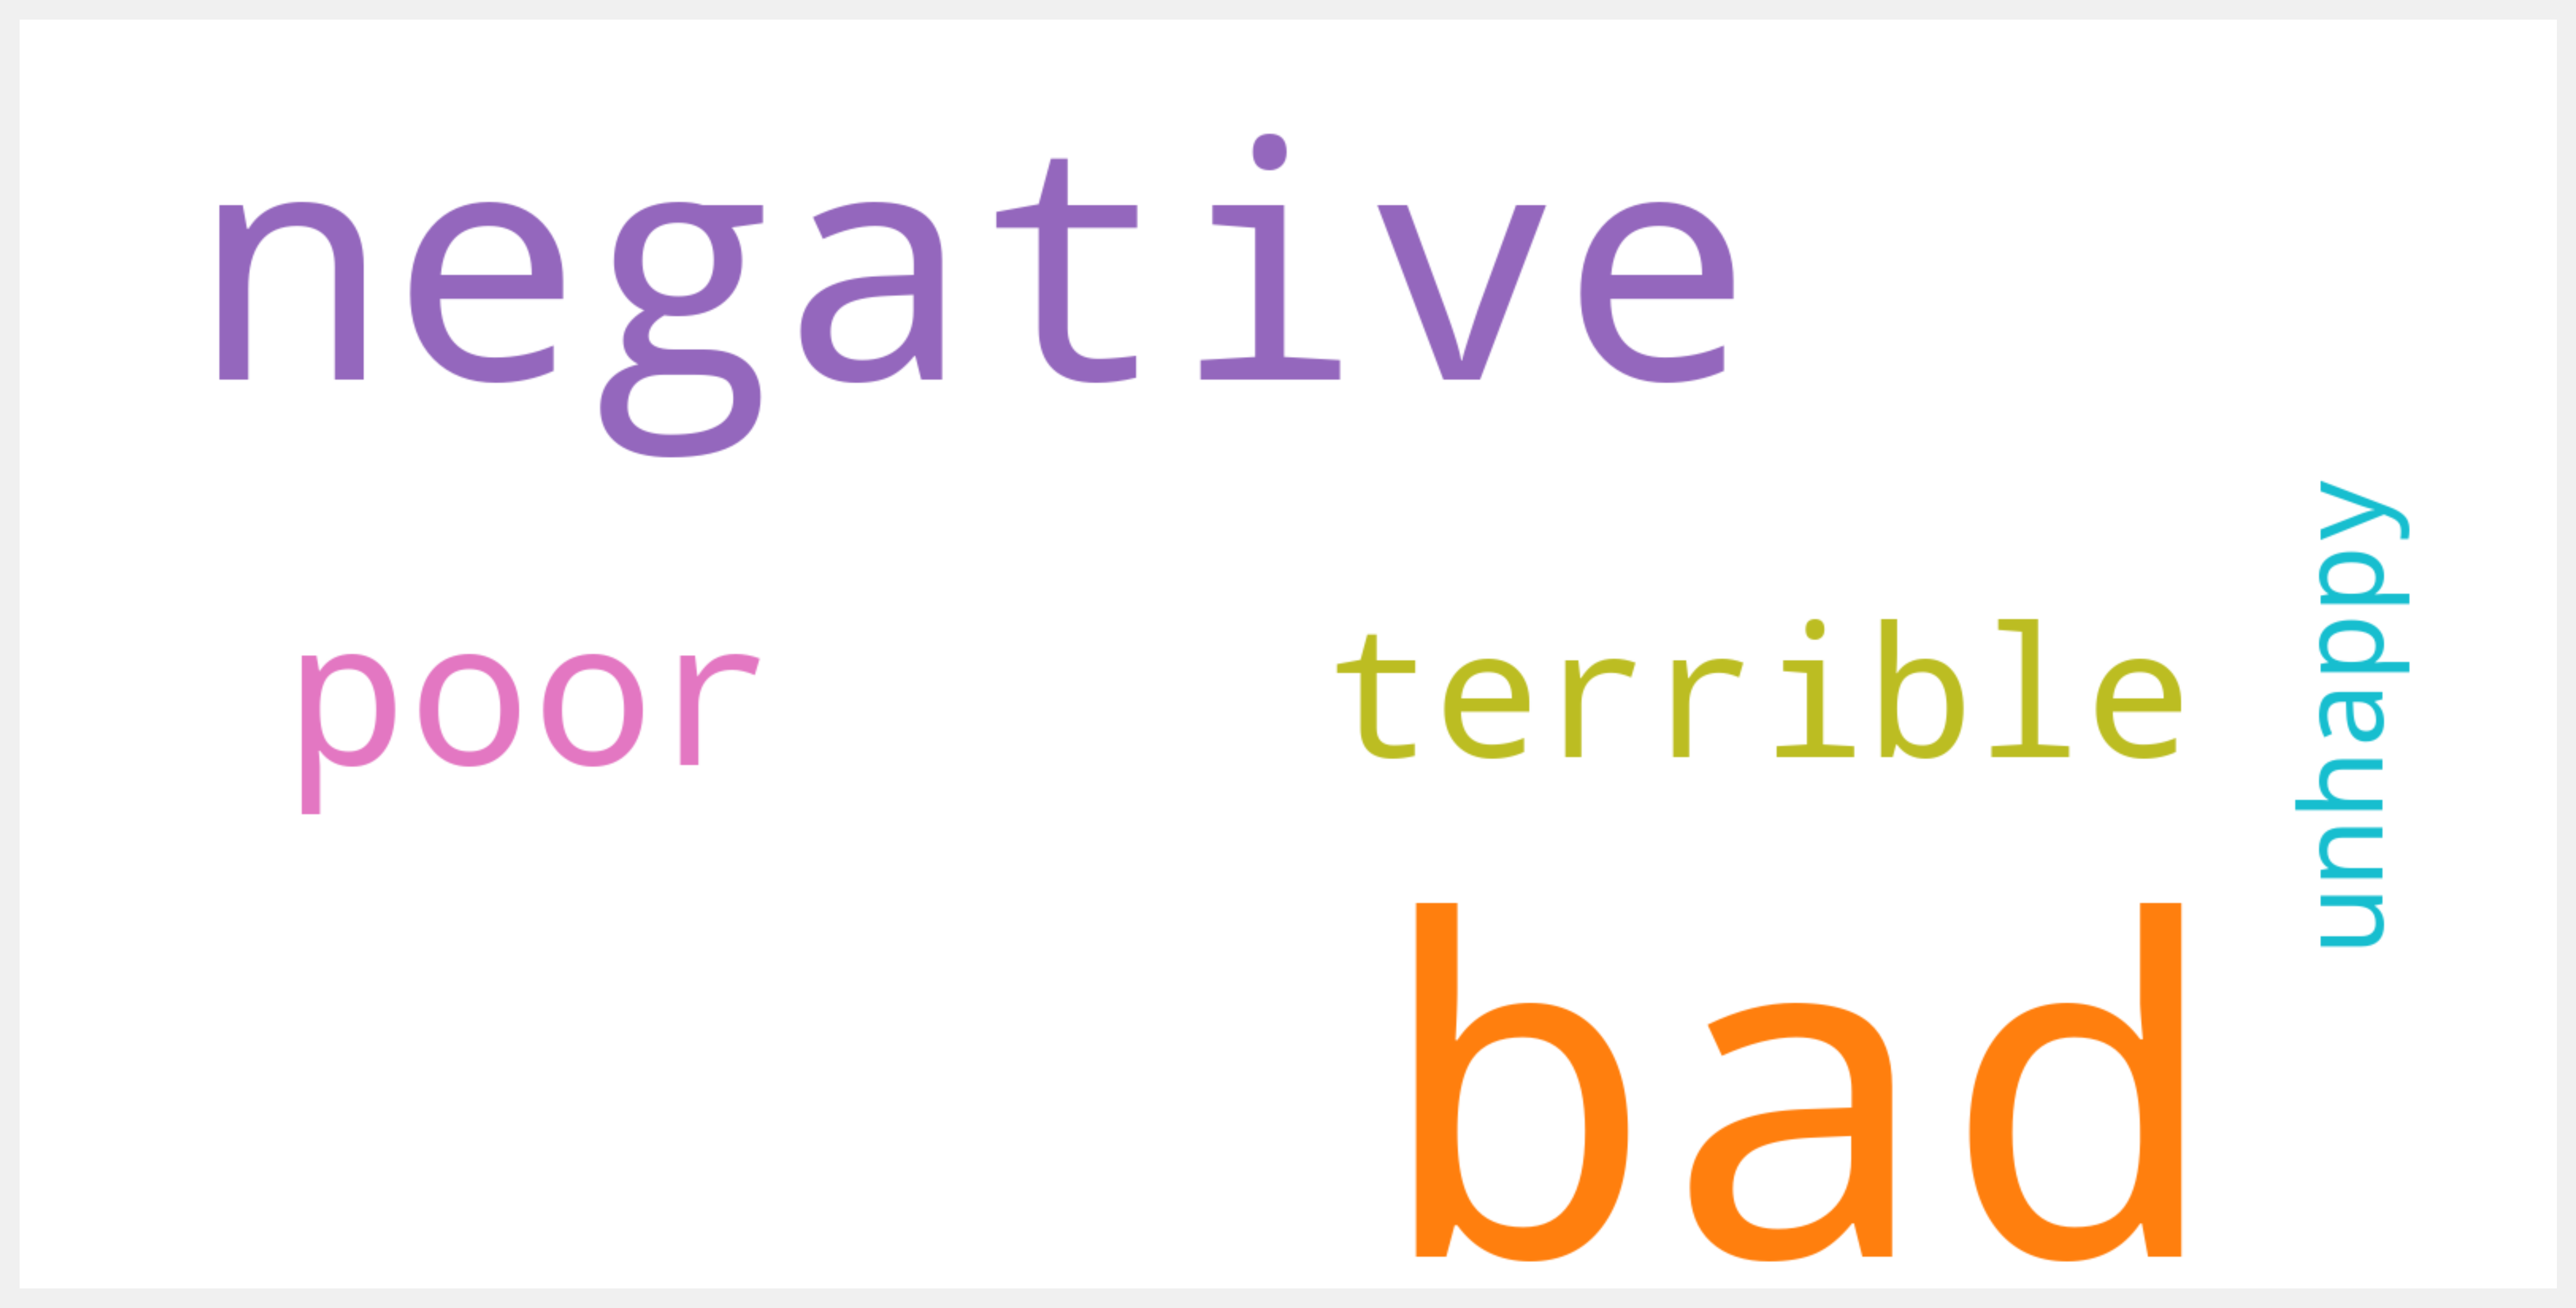

In [63]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a list of negative keywords
negative_keywords = ['bad', 'poor', 'unhappy', 'terrible', 'negative']

# Assuming your DataFrame is named 'reviews_df' and it has a column 'comments'
comments = reviews_df['comments'].tolist()

# Using CountVectorizer to get the frequency of each word
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))

# Creating a WordCloud dictionary for negative keywords
neg_keyword_dict = {word: word_frequencies[word] for word in negative_keywords if word in word_frequencies}

# Generating WordCloud for negative reviews with a colorful white theme
neg_word_wc = WordCloud(width=1600, height=800, background_color='white', colormap='tab10').generate_from_frequencies(neg_keyword_dict)

# Plotting the WordCloud for negative reviews in a colorful white theme
plt.figure(figsize=(20, 8), dpi=400)
plt.imshow(neg_word_wc, interpolation='bilinear')
plt.axis('off')
plt.show()
